In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
# Load dataset
categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']  # Selecting four classes
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))


In [4]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data.data)
y = data.target

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Naïve Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [6]:
# Predict on test data
y_pred = classifier.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred, target_names=categories))


Accuracy: 0.8127
                    precision    recall  f1-score   support

       alt.atheism       0.71      0.82      0.76       160
     comp.graphics       0.88      0.92      0.90       195
         sci.space       0.83      0.93      0.88       197
talk.religion.misc       0.83      0.45      0.58       126

          accuracy                           0.81       678
         macro avg       0.81      0.78      0.78       678
      weighted avg       0.82      0.81      0.80       678



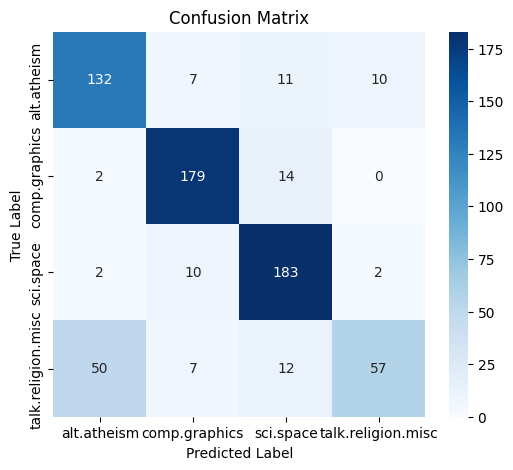

In [7]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


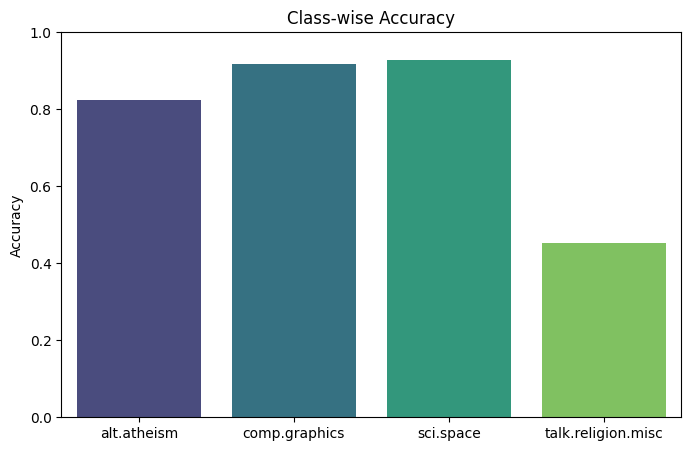

In [8]:
# Bar chart for class-wise accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=class_accuracy, palette='viridis')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.ylim(0, 1)
plt.show()


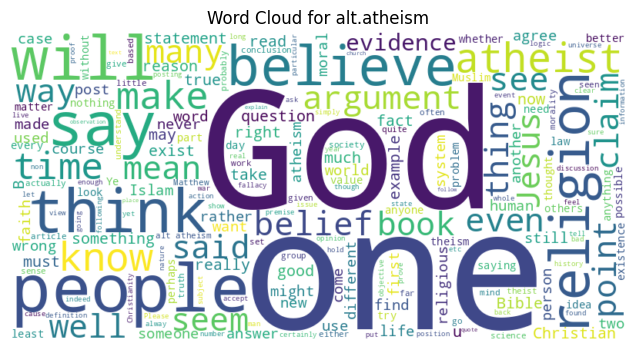

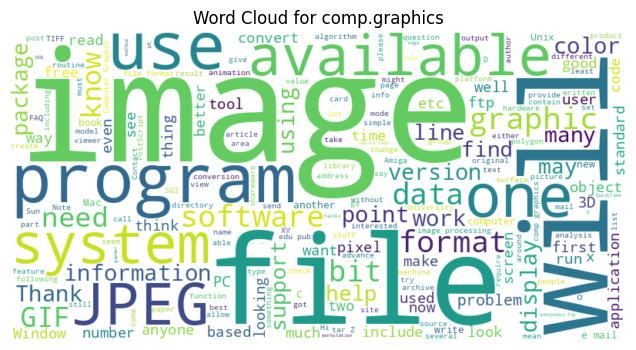

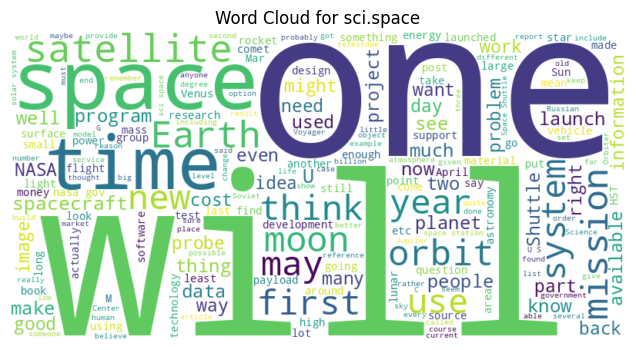

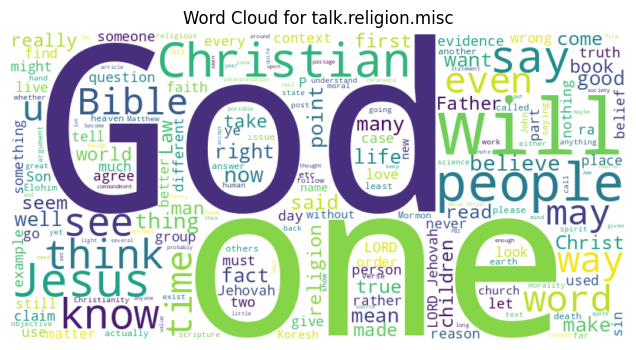

In [9]:
# Word cloud for each category
for i, category in enumerate(categories):
    text = " ".join([data.data[j] for j in range(len(y)) if y[j] == i])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category}')
    plt.show()
